#**Data Analysis and Visualization of Flipkart.'s Smartwatches**

----------------------------------------------------------------------------------------------------------------------------------------------------------------
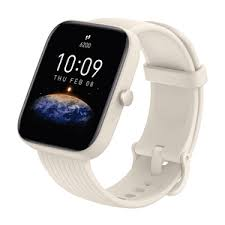

Here we are conducting an analysis of smartwatch  products of ten major brands from Flipkart, the world’s leading eCommerce company. This analysis is created primarily for pricing analysts and marketers at eCommerce companies. The 10 major brands we analyzed are APPLE, Noise, boAt, Honor, SAMSUNG, FITBIT, Amazfit, GARMIN, Huawei, FOSSIL.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing required library
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

#**Dataset**

---


The following data fields for each smartwatches :

1. Product_url: Product URL is the URL to the page which contains the product information.
2. Product_name:  Name of the smartwatches 
3. Brand: Brand is the name of the brand of smartwatches. 
4. Sale_price: Sale price is the price at which the product is available on Flipkart for sale.
6. MRP: MRP is the maximum retail price of the product.
7. Discount_percentage: Discount percentage is the discount offered by the brand for that particular product.
8. Memory: The Memory Capacity of the smartwatches.
9. Number_of_ratings: The total number of star ratings given to that particular product.
10. Number_of_reviews: The total number of reviews given to the product by the user.
11. Star rating: Star rating is the average star rating of the product.


In [3]:
# Reading csv file
df=pd.read_csv("/content/drive/MyDrive/smartwatch_data2.csv")

In [4]:
# displaying dataset
df.head(10)

,Product_url,Product_name,Brand,Sale_price,MRP,Discount_percentage,Memory,No_of_ratings,No_of_reviews,Star_rating,Description
0,https://www.flipkart.com/apple-watch-series-3-...,"APPLE Watch Series 3 (GPS, 42mm) - Space Grey ...",APPLE,"23,349","23,900",2,8,"55,019","4,837",4.6,"Check your heart rate, and get notifications f..."
1,https://www.flipkart.com/apple-watch-series-8-...,APPLE Watch Series 8 GPS,APPLE,"48,900","48,900",0,32,67,5,4.3,"{'Sales Package': 'Smartwatch, Strap, 1m Magne..."
2,https://www.flipkart.com/apple-watch-se-gps-ce...,"APPLE Watch SE (GPS+Cellular, 44mm) Space Grey...",APPLE,"36,900","36,900",0,32,"3,278",245,4.6,With powerful features to help keep you connec...
3,https://www.flipkart.com/apple-watch-series7-g...,"APPLE Watch Series7 (GPS, 45mm) - Blue Alumini...",APPLE,"44,544","44,900",0,32,"2,479",145,4.6,"The largest, most advanced Always-on Retina di..."
4,https://www.flipkart.com/apple-watch-series7-g...,"APPLE Watch Series7 (GPS, 41mm) - Starlight Al...",APPLE,"41,900","41,900",0,32,"2,479",145,4.6,"The largest, most advanced Always-on Retina di..."
5,https://www.flipkart.com/apple-watch-se-gps-ce...,"APPLE Watch SE(GPS + Cellular, 44mm) Space Gre...",APPLE,"36,900","36,900",0,32,"3,278",245,4.6,With powerful features to help keep you connec...
6,https://www.flipkart.com/apple-watch-series7-g...,"APPLE Watch Series7 (GPS + Cellular, 45mm)Blue...",APPLE,No price available,No price available,0,32,"1,370",106,4.5,"The largest, most advanced Always-on Retina di..."
7,https://www.flipkart.com/apple-watch-series-8-...,APPLE Watch Series 8 GPS + Cellular,APPLE,"58,900","58,900",0,32,75,3,4.5,"{'Sales Package': 'Smartwatch, Strap, 1m Magne..."
8,https://www.flipkart.com/apple-watch-se-gps-ce...,"APPLE Watch SE (GPS + Cellular, 40mm) - Space ...",APPLE,"33,900","33,900",0,32,"3,278",245,4.6,With powerful features to help keep you connec...
9,https://www.flipkart.com/apple-watch-se-gps-ce...,"APPLE Watch SE (GPS + Cellular, 40mm) - Gold A...",APPLE,"33,900","33,900",0,32,"3,278",245,4.6,With powerful features to help keep you connec...


In [5]:
# The information about our features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_url          957 non-null    object 
 1   Product_name         957 non-null    object 
 2   Brand                957 non-null    object 
 3   Sale_price           957 non-null    object 
 4   MRP                  957 non-null    object 
 5   Discount_percentage  957 non-null    int64  
 6   Memory               957 non-null    object 
 7   No_of_ratings        957 non-null    object 
 8   No_of_reviews        957 non-null    object 
 9   Star_rating          957 non-null    float64
 10  Description          957 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 82.4+ KB


In [6]:
# The shape of our features
df.shape

(957, 11)

In [7]:
# Finding the count of Duplicate value
df.duplicated().sum()

57

In [8]:
# Droping the duplicate values
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(900, 11)

In [10]:
# Replacing NAN values with zero
df["MRP"]=df["MRP"].replace("No price available", 0)
df["Sale_price"]=df["Sale_price"].replace("No price available", 0)
df["Memory"]=df["Memory"].replace("Memory data not available", 0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 956
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_url          900 non-null    object 
 1   Product_name         900 non-null    object 
 2   Brand                900 non-null    object 
 3   Sale_price           900 non-null    object 
 4   MRP                  900 non-null    object 
 5   Discount_percentage  900 non-null    int64  
 6   Memory               900 non-null    object 
 7   No_of_ratings        900 non-null    object 
 8   No_of_reviews        900 non-null    object 
 9   Star_rating          900 non-null    float64
 10  Description          900 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 84.4+ KB


In [12]:
# Converting the object values in the dataset to string
df[['Sale_price',"MRP","Memory","No_of_reviews","No_of_ratings"]] = df[['Sale_price',"MRP","Memory","No_of_reviews","No_of_ratings"]].astype(str)

In [13]:
# Removing comma from the values
df["Sale_price"] = df["Sale_price"].str.replace(',','')
df["Sale_price"] = df["Sale_price"].astype(int)
df["MRP"] = df["MRP"].str.replace(',','')
df["MRP"] = df["MRP"].astype(int)
df["No_of_reviews"] = df["No_of_reviews"].str.replace(',','')
df["No_of_reviews"] = df["No_of_reviews"].astype(int)
df["No_of_ratings"] = df["No_of_ratings"].str.replace(',','')
df["No_of_ratings"] = df["No_of_ratings"].astype(int)
df["Memory"] = df["Memory"].astype(int)

In [14]:
# converting string data type to intiger
df.convert_dtypes().dtypes

Product_url             string
Product_name            string
Brand                   string
Sale_price               Int64
MRP                      Int64
Discount_percentage      Int64
Memory                   Int64
No_of_ratings            Int64
No_of_reviews            Int64
Star_rating            Float64
Description             string
dtype: object

#**Analysis of the dataset**

---



##**1. Product range of the 10 brands**

---



*   The product range is defined as the variations of a single product that are similar yet distinct. 

*   It is important to have a wide range of products so that brands can cater to the needs and preferences of different customer segments.

*  Here we're looking at the product range of his ten leading brands of smartwatches above. Our analysis reached the following conclusions:







In [15]:
# listing name of the brands
df.Brand.unique()

array(['APPLE', 'Noise', 'boAt', 'Honor', 'SAMSUNG', 'FITBIT', 'Amazfit',
       'GARMIN', 'Huawei', 'FOSSIL'], dtype=object)

In [16]:
# Finding the count of each brand
df.Brand.value_counts()

APPLE      269
GARMIN     172
FOSSIL     108
Noise       96
boAt        64
SAMSUNG     59
FITBIT      51
Amazfit     47
Huawei      21
Honor       13
Name: Brand, dtype: int64

Text(0, 0.5, 'Number of Products')

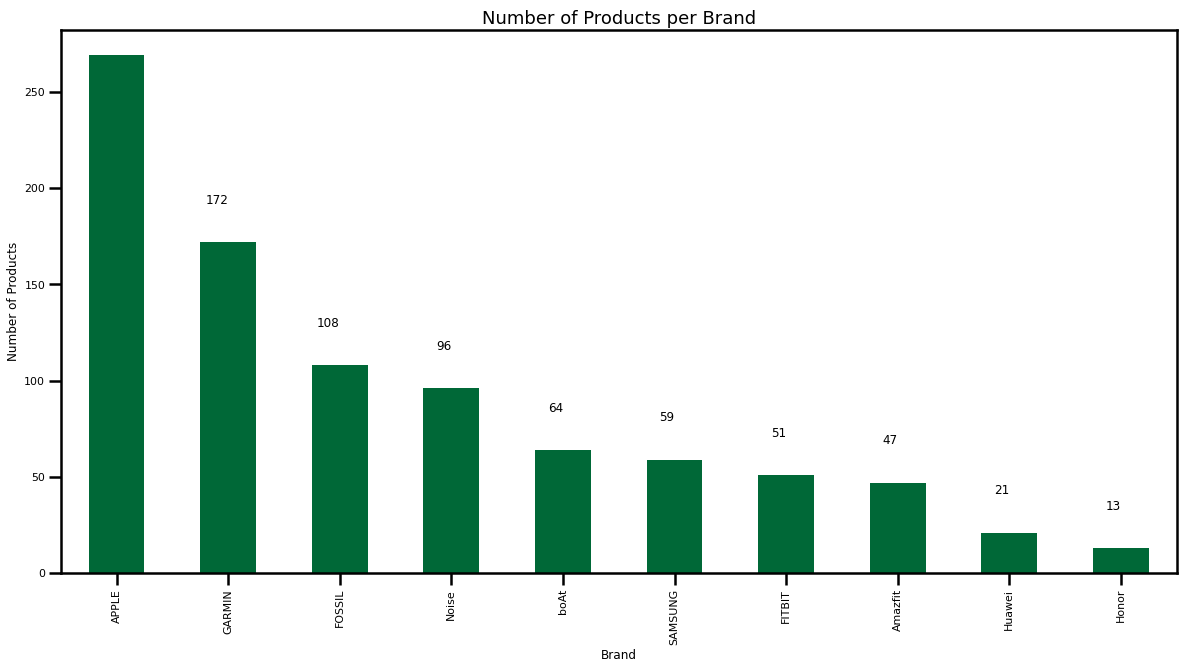

In [17]:
# Visualizing brands per counts
sns.set_context("poster",font_scale=0.5)
plt.figure(figsize=(20,10))
ax = df.Brand.value_counts().plot(kind='bar',cmap='RdYlGn_r')

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+20),ha='right',color='black')
    
plt.title('Number of Products per Brand',fontsize=18)
plt.xlabel('Brand')
plt.ylabel('Number of Products')

In [18]:
# Finding the count of each product
df.Product_name.value_counts().head(20)

APPLE Watch Series 6 GPS + Cellular                                                               24
APPLE Watch Series 8 GPS + Cellular                                                               19
APPLE Watch Ultra GPS + Cellular                                                                  18
APPLE Watch Series 5 GPS + Cellular                                                               18
APPLE Watch SE GPS + Cellular                                                                     18
APPLE Watch Series 3 GPS + Cellular -                                                             12
FOSSIL 4th Gen Venture HR Smartwatch                                                              12
APPLE Watch Series 2 -                                                                            11
APPLE Watch Series 4 GPS                                                                          10
APPLE Watch Series 6 GPS                                                                   

###Findings

*   APPLE has the largest product range (265).
*   GARMIN has the second largest product range(172).
*   Honor has the smallest product range (13).



##**2. Average maximum retail price, Average  sale price and Average discount percentage of 10 brands**


---









In [19]:
#We divided each product into two categories: Expensive and Not Expensive. The MRP below 10000 taken as Not  Expensive and above 10000 taken as Expensive.
Expensive=df[df['MRP']>10000]
N_Expensive=df[df['MRP']<10000]

In [20]:
# printing count 
print(len(Expensive))
print(len(N_Expensive))

709
191


In [21]:
# printing % of expensive product
(len(Expensive)/float(len(Expensive)+len(N_Expensive)))*100

78.77777777777779

In [22]:
# printing % of not_expensive product
(len(N_Expensive)/float(len(Expensive)+len(N_Expensive)))*100

21.22222222222222

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


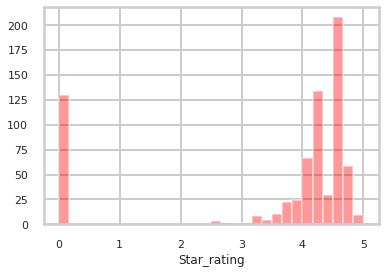

In [23]:
#visualization of Expensive per count
sns.set_style('whitegrid')
sns.distplot(Expensive['Star_rating'], kde = False, color ='red', bins = 30)

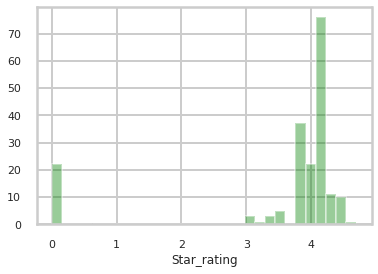

In [24]:
#visualization of Not_Expensive per count
sns.set_style('whitegrid')
sns.distplot(N_Expensive['Star_rating'], kde = False, color ='green', bins = 30)

###**Findings:**

---



*   79% smartwatch products are Expensive 
*   21%  smartwatch products are Not Expensive.



##**Average maximum retail price:**

---


By definition, the maximum retail price (MRP) is a manufacturer calculated price that is the highest price that is charged for a product sold.




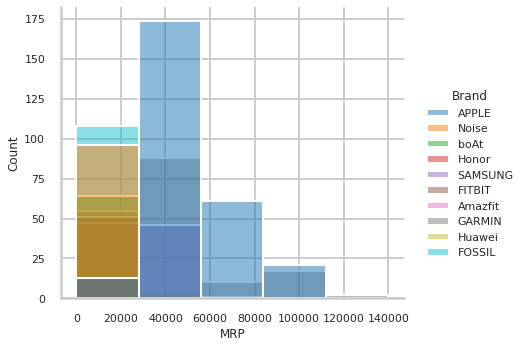

In [25]:
# Number of  products per MRP
sns.displot(df, x='MRP',bins=5, hue='Brand',aspect=1.2)

In [26]:
# Table brands and it's MRP
brand_mean1 = df.groupby(['Brand'])['MRP'].mean().reset_index()
brand_mean1.sort_values(by='MRP',ascending=False).head(10)

,Brand,MRP
0,APPLE,50444.754647
4,GARMIN,43813.354651
8,SAMSUNG,32760.050847
6,Huawei,20563.571429
2,FITBIT,19398.901961
3,FOSSIL,18714.018519
5,Honor,16793.923077
1,Amazfit,13743.680851
9,boAt,7229.187500
7,Noise,5905.250000


Text(0, 0.5, 'Avg.Price')

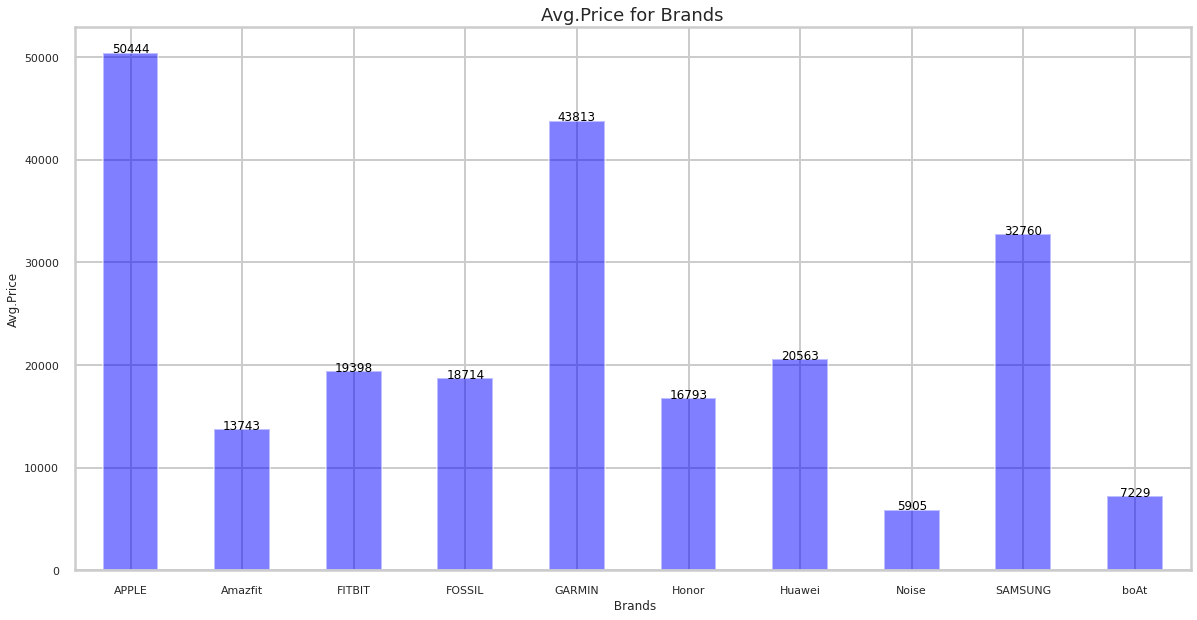

In [27]:
# Visualization of avg MRP for brands
sns.set_context("poster",font_scale=0.5 )
plt.figure(figsize=(20,10))
ax = df.groupby('Brand')['MRP'].mean().plot(kind='bar',color='BLUE',alpha=0.5,rot=0)

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()-15),ha='center',color='black')
    
plt.title('Avg.Price for Brands',fontsize=18)
plt.xlabel(' Brands')
plt.ylabel('Avg.Price')

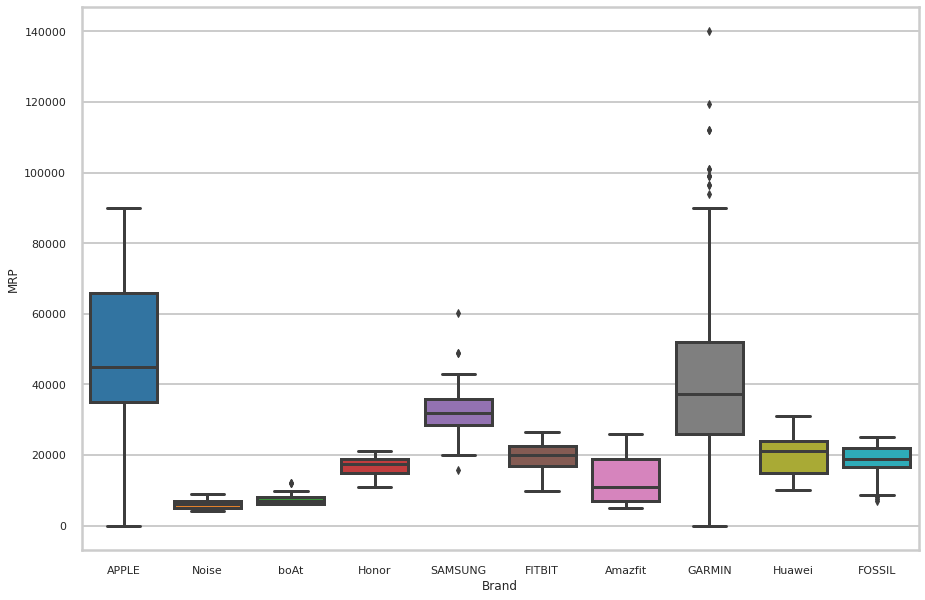

In [28]:
# BoxPlot-Visualization of avg Sale_price for brands
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(x="Brand",y="MRP",data=df,ax=ax)

In [29]:
# Table of products and it's brand and MRP
brand_mean2 = df.groupby(['Brand','Product_name'])['MRP'].mean().reset_index()
brand_mean2.sort_values(by='MRP',ascending=False).head(15)

,Brand,Product_name,MRP
192,GARMIN,GARMIN Fenix 6X Solar Titanium Smartwatch,119490.000000
197,GARMIN,"GARMIN Fenix 7X Sapphire Solar, Up to 28 days/...",116990.000000
176,GARMIN,GARMIN EPIX GEN 2 Smartwatch,111990.000000
194,GARMIN,GARMIN Fenix 7 Sapphire Solar Edition Smartwatch,100990.000000
196,GARMIN,GARMIN Fenix 7S Sapphire Solar Smartwatch,100990.000000
177,GARMIN,"GARMIN Epix Gen 2, Sapphire, Up to 16 days Bat...",98990.000000
189,GARMIN,GARMIN Fenix 6X Pro Solar Smartwatch,98990.000000
191,GARMIN,GARMIN Fenix 6X Smartwatch,96390.000000
178,GARMIN,"GARMIN Epix Gen 2, Up to 16 days Battery, AMOL...",89990.000000
70,APPLE,APPLE Watch Ultra GPS + Cellular,89900.000000


###**Findings:**

*   Average maximum retail price of  APPLE is 50444. APPLE is the most Expensive brand.
*   Average maximum retail price of  GARMIN is 43813. GARMIN is the second Expensive brand.
*  Average maximum retail price of  Noise is 5905. Noise is the cheapest brand.



##**Average discount percentage**

---



The analysis of the data evaluates the average discount percentage in the running shoes category of the six brands, and the following conclusion is reached:


In [30]:
# Table of brands and it's Discount Percentage
brand_mean3 = df.groupby(['Brand'])['Discount_percentage'].mean().reset_index()
brand_mean3.sort_values(by='Discount_percentage',ascending=False).head(10)

,Brand,Discount_percentage
9,boAt,60.312500
7,Noise,46.104167
6,Huawei,32.571429
1,Amazfit,27.531915
5,Honor,26.384615
8,SAMSUNG,19.000000
3,FOSSIL,16.120370
4,GARMIN,14.988372
2,FITBIT,10.666667
0,APPLE,0.490706


Text(0, 0.5, 'Avg.Discount_percentage')

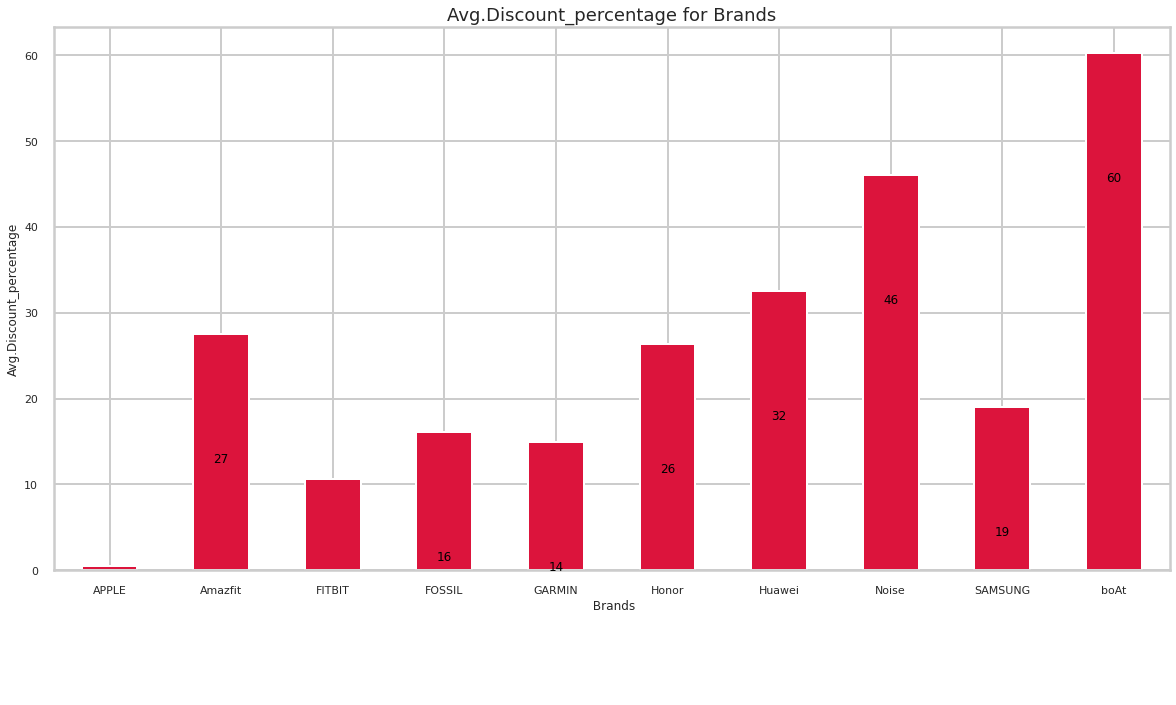

In [31]:
# Visualization of avg Discount Percentage for brands
sns.set_context("poster",font_scale=0.5)
plt.figure(figsize=(20,10))
ax = df.groupby('Brand')['Discount_percentage'].mean().plot(kind='bar',color='crimson',rot=0)

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()-15),ha='center',color='black')
    
plt.title('Avg.Discount_percentage for Brands',fontsize=18)
plt.xlabel(' Brands')
plt.ylabel('Avg.Discount_percentage')

In [32]:
# Table of products and it's brand and discount percentage
brand_mean4 = df.groupby(['Brand','Product_name'])['Discount_percentage'].mean().reset_index()
brand_mean4.sort_values(by='Discount_percentage',ascending=False).head(15)

,Brand,Product_name,Discount_percentage
374,boAt,boAt Wave beat 1.69Inch HD display with comple...,74.00
362,boAt,boAt Storm call 1.69 inch HD display with blue...,72.00
366,boAt,"boAt Watch Mercury 1.54"" TFTDisplay Smartwatch",71.00
295,Noise,Noise ColorFit Brio Smartwatch,70.00
369,boAt,"boAt Wave Neo with 1.69 inch , 2.5D Curved Dis...",69.00
309,Noise,"Noise ColorFit Qube Spo2, 1.4"" Full Touch disp...",68.00
363,boAt,"boAt Vertex 1.69"" HealthEcosystem Smartwatch",66.75
358,boAt,"boAt Storm Pro Call Bluetooth Calling 1.78"" AM...",64.00
359,boAt,"boAt Storm Pro Call with Bluetooth Calling, 1....",64.00
296,Noise,Noise ColorFit Caliber 2 with 1.83'' display U...,64.00


###**Findings**

---



*  boAt offers the highest average discount percentage (60.3%).
*  APPLE offers the lowest average discount percentage (0.4%).




##**Average  sale price:**

---



The analysis of the data evaluates the average maximum retail price smartwatch  products of ten major brands is following :



In [33]:
# Table of bands and it's Sale_price
brand_mean5 = df.groupby(['Brand'])['Sale_price'].mean().reset_index()
brand_mean5.sort_values(by='Sale_price',ascending=False).head(10)

,Brand,Sale_price
0,APPLE,50158.977695
4,GARMIN,37534.168605
8,SAMSUNG,26698.186441
2,FITBIT,17234.529412
3,FOSSIL,15455.185185
6,Huawei,13849.285714
5,Honor,12618.076923
1,Amazfit,10046.000000
7,Noise,3248.750000
9,boAt,2820.812500


Text(0, 0.5, 'Avg.Sale_Price')

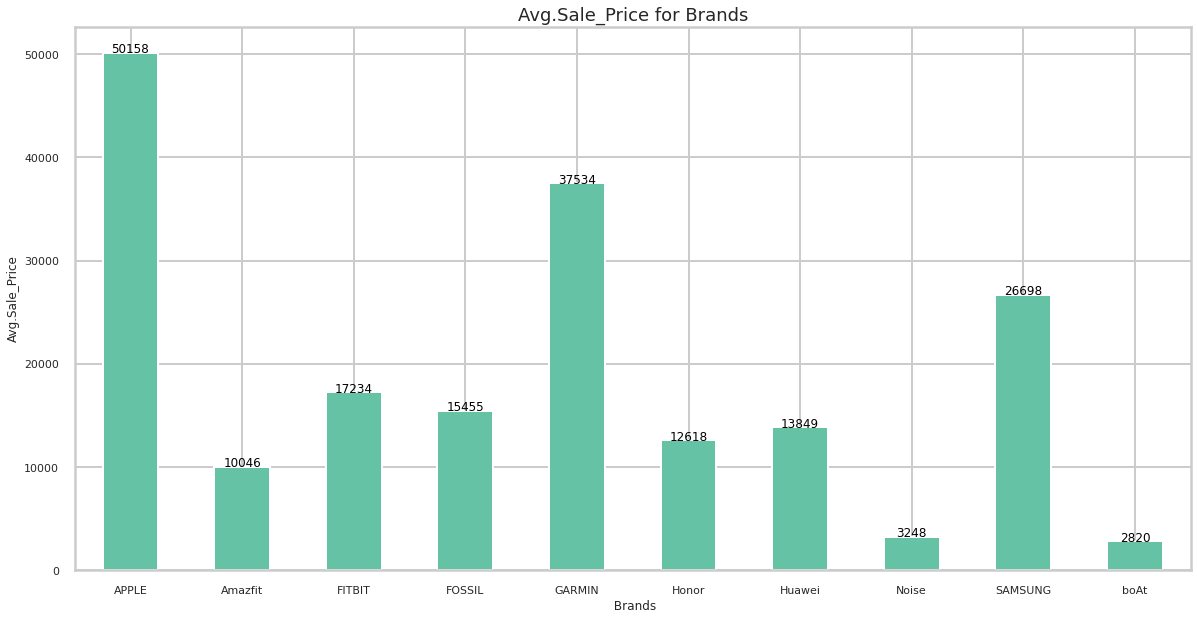

In [34]:
# Visualization of avg Sale_price for brands
sns.set_context("poster",font_scale=0.5)
sns.set_palette('Set2')
plt.figure(figsize=(20,10))
ax = df.groupby('Brand')['Sale_price'].mean().plot(kind='bar',rot=0)

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()-15),ha='center',color='black')
    
plt.title('Avg.Sale_Price for Brands',fontsize=18)
plt.xlabel(' Brands')
plt.ylabel('Avg.Sale_Price')

In [35]:
# Table of products and it's brand and sale_prices
brand_mean6 = df.groupby(['Brand','Product_name'])['Sale_price'].mean().reset_index()
brand_mean6.sort_values(by='Sale_price',ascending=False).head(10)

,Brand,Product_name,Sale_price
176,GARMIN,GARMIN EPIX GEN 2 Smartwatch,111990.0
197,GARMIN,"GARMIN Fenix 7X Sapphire Solar, Up to 28 days/...",109990.0
192,GARMIN,GARMIN Fenix 6X Solar Titanium Smartwatch,105990.0
194,GARMIN,GARMIN Fenix 7 Sapphire Solar Edition Smartwatch,100990.0
196,GARMIN,GARMIN Fenix 7S Sapphire Solar Smartwatch,100990.0
177,GARMIN,"GARMIN Epix Gen 2, Sapphire, Up to 16 days Bat...",98990.0
70,APPLE,APPLE Watch Ultra GPS + Cellular,89900.0
178,GARMIN,"GARMIN Epix Gen 2, Up to 16 days Battery, AMOL...",89490.0
191,GARMIN,GARMIN Fenix 6X Smartwatch,86990.0
189,GARMIN,GARMIN Fenix 6X Pro Solar Smartwatch,85590.0


In [36]:
# Table of brands and it's MRP Sale price
table = pd.pivot_table(df, index='Brand', values=['MRP','Sale_price'])
table

,MRP,Sale_price
Brand,,
APPLE,50444.754647,50158.977695
Amazfit,13743.680851,10046.000000
FITBIT,19398.901961,17234.529412
FOSSIL,18714.018519,15455.185185
GARMIN,43813.354651,37534.168605
Honor,16793.923077,12618.076923
Huawei,20563.571429,13849.285714
Noise,5905.250000,3248.750000
SAMSUNG,32760.050847,26698.186441


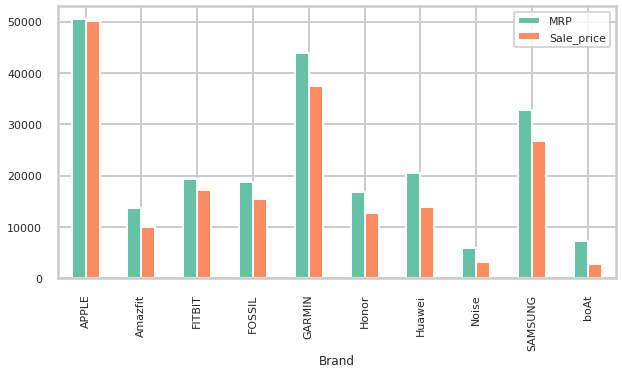

In [37]:
# The figure of difference between MRP and Sale Price.
table.plot(kind='bar',figsize=(10,5))

##**3. Average Rating across brands and Number of Ratings and Review**

---


The average rating is the average of all the ratings of all the products of that brand. The average rating of a brand tells us about the performance of the brand.

##**Number of Ratings**

---


In our analysis, we set the base positive rating as 3.5. Ratings above 3.5 are considered as positive ratings, whereas those below are considered to be negative ratings. The result of our analysis is as follows:


In [38]:
# Table of brands and it's rating count
brand_mean7 = df.groupby(['Brand'])['No_of_ratings'].sum().reset_index()
brand_mean7.sort_values(by='No_of_ratings',ascending=False).head(10)

,Brand,No_of_ratings
9,boAt,6317637
7,Noise,3312405
0,APPLE,899940
8,SAMSUNG,263556
5,Honor,67802
3,FOSSIL,55938
2,FITBIT,55101
1,Amazfit,47396
6,Huawei,15233
4,GARMIN,1707


Text(0, 0.5, 'No_of_ratings and Reviews')

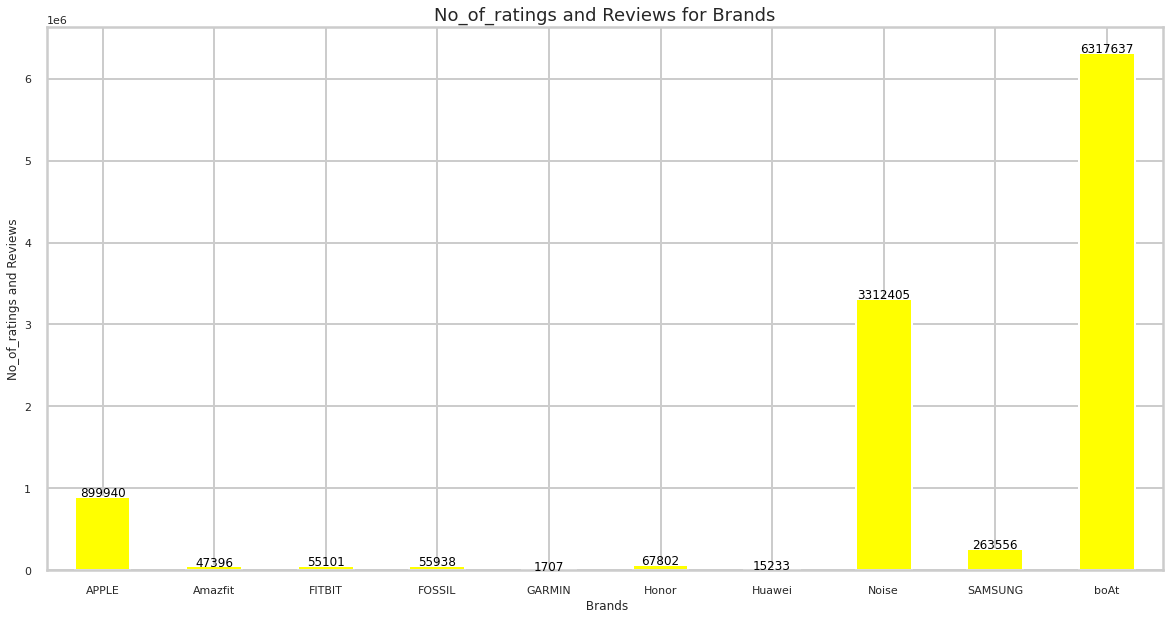

In [39]:
# Visualization of rating count for each brands
sns.set_context("poster",font_scale=0.5)
plt.figure(figsize=(20,10))
ax = df.groupby('Brand')['No_of_ratings'].sum().plot(kind='bar',color='Yellow',rot=0)

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()-15),ha='center',color='Black')
    
plt.title('No_of_ratings and Reviews for Brands',fontsize=18)
plt.xlabel(' Brands')
plt.ylabel('No_of_ratings and Reviews')

In [40]:
# Table of products and it's brand and rating count
brand_mean8= df.groupby(['Brand','Product_name'])['No_of_ratings'].sum().reset_index()
brand_mean8.sort_values(by='No_of_ratings',ascending=False).head(10)

,Brand,Product_name,No_of_ratings
355,boAt,"boAt Storm 1.3"" CurvedDisplay Smartwatch",3644928
298,Noise,Noise ColorFit Caliber Smart Watch with 15-day...,911036
354,boAt,"boAt Storm 1.3"" CaptainAmericaEdition Smartwatch",607488
353,boAt,"boAt Storm 1.3"" BlackPantherEdition Smartwatch",607488
356,boAt,"boAt Storm 1.3"" IronManEdition Smartwatch",607488
320,Noise,"Noise Icon Buzz BT Calling with 1.69"" display ...",597208
303,Noise,Noise ColorFit Pro 2 Smartwatch,584048
34,APPLE,APPLE Watch Series 3 GPS -,385133
309,Noise,"Noise ColorFit Qube Spo2, 1.4"" Full Touch disp...",230199
299,Noise,"Noise ColorFit Icon 2 1.8 Display, Bluetooth C...",228222


###**Findings:**

---



*   boAt has the highest number of ratings (6317637).
*   GARMIN has the lowest number of ratings (1707).



##**Average Rating across brands**

---


The analysis of the data in hand shows the average rating in the running shoes category across each brand as follows:


In [41]:
# Table of brands and it's mean rating
brand_mean9 = df.groupby(['Brand'])['Star_rating'].mean().reset_index()
brand_mean9.sort_values(by='Star_rating',ascending=False).head(10)

,Brand,Star_rating
0,APPLE,4.476208
5,Honor,4.346154
8,SAMSUNG,4.054237
6,Huawei,3.938095
3,FOSSIL,3.776852
9,boAt,3.775000
7,Noise,3.501042
1,Amazfit,3.278723
2,FITBIT,2.719608
4,GARMIN,1.915698


Text(0, 0.5, 'Star_rating')

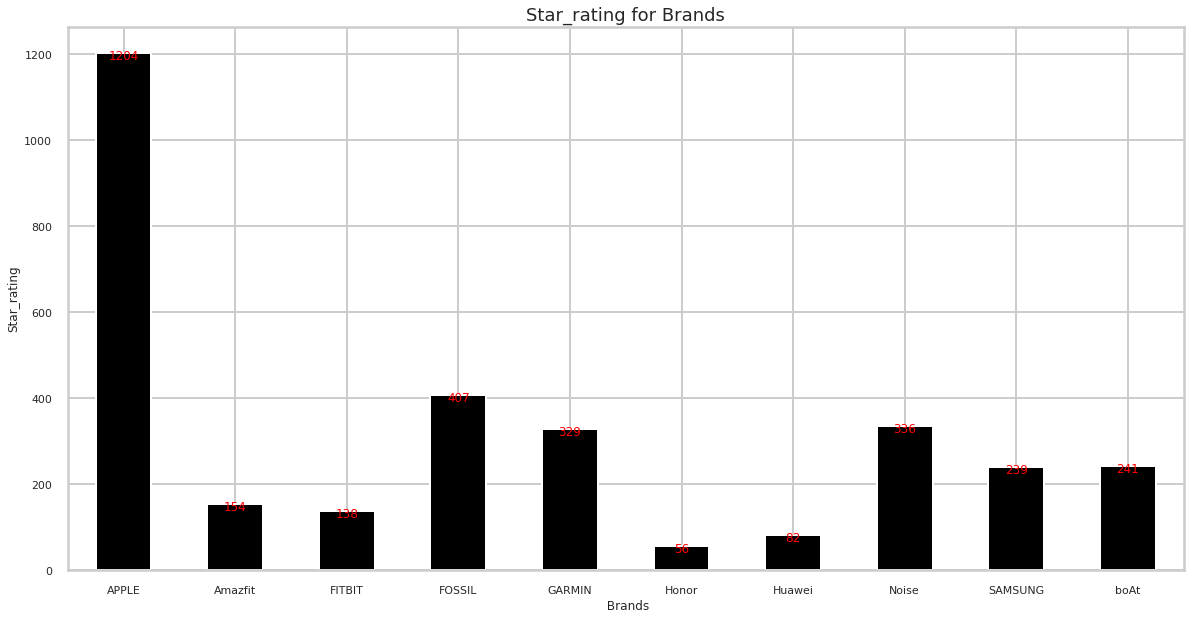

In [42]:
# Visualization of mean rating for each brands
sns.set_context("poster",font_scale=0.5)
plt.figure(figsize=(20,10))
ax = df.groupby('Brand')['Star_rating'].sum().plot(kind='bar',color='black',rot=0)

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()-15),ha='center',color='red')
    
plt.title('Star_rating for Brands',fontsize=18)
plt.xlabel(' Brands')
plt.ylabel('Star_rating')

([<matplotlib.patches.Wedge at 0x7fdd440b8510>,
 [Text(1.0161378695246601, 0.42126456071913404, 'APPLE'),
  Text(0.5243862679260796, 0.9669638266298063, 'Amazfit'),
  Text(-0.032702744940307595, 1.0995137700244455, 'FITBIT'),
  Text(-0.6212131198035878, 0.9077963757274499, 'FOSSIL'),
  Text(-0.9802870274409616, 0.499036415335558, 'GARMIN'),
  Text(-1.096577387265068, -0.08670659570596248, 'Honor'),
  Text(-0.7614264115644067, -0.7938701529671909, 'Huawei'),
  Text(-0.1222777428341815, -1.0931825801792572, 'Noise'),
  Text(0.5767878226619574, -0.9366513799855731, 'SAMSUNG'),
  Text(1.0401314833923492, -0.3579476180337444, 'boAt')],
 [Text(0.5542570197407236, 0.229780669483164, '12.5%'),
  Text(0.28602887341422517, 0.5274348145253488, '9.2%'),
  Text(-0.017837860876531414, 0.5997347836496975, '7.6%'),
  Text(-0.3388435198928661, 0.49516165948769986, '10.6%'),
  Text(-0.5347020149677972, 0.2722016810921225, '5.4%'),
  Text(-0.5981331203264006, -0.0472945067487068, '12.1%'),
  Text(-0.4153

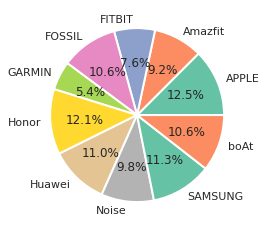

In [43]:
# Visualization of % of avg rating for each brands
plt.pie(df.groupby('Brand')['Star_rating'].mean(),autopct='%1.1f%%',labels=df.groupby('Brand')['Star_rating'].mean().reset_index()['Brand'])

In [44]:
# Table of products and it's brand and rating
brand_mean10 = df.groupby(['Brand','Product_name'])['Star_rating'].mean().reset_index()
brand_mean10.sort_values(by='Star_rating',ascending=False).head(10)

,Brand,Product_name,Star_rating
272,GARMIN,"GARMIN vivoactive 4S 40mm, Dust Rose/Light Gol...",5.0
7,APPLE,APPLE Watch Nike+ GPS + Cellular -,5.0
204,GARMIN,"GARMIN Forerunner 255, GPS Running Smartwatch,...",5.0
211,GARMIN,"GARMIN Forerunner 745, GPS Multisport Watch, T...",5.0
225,GARMIN,"GARMIN Instinct 2, Battery Upto 28 days, Tracb...",5.0
245,GARMIN,"GARMIN Venu 2 Plus, AMOLED Display, Built in S...",4.8
70,APPLE,APPLE Watch Ultra GPS + Cellular,4.8
246,GARMIN,"GARMIN Venu 2, GPS Smartwatch, AMOLED Display,...",4.8
38,APPLE,"APPLE Watch Series 4 GPS,",4.7
198,GARMIN,GARMIN Forerunner 235 Smartwatch,4.7


###**Findings:**

---



*   APPLE has the highest average rating (4.4).
*   GARMIN has the lowest average rating (1.9).




##**Memory for each brands**

---



In [45]:
# list of product count per Memory
df['Brand'].groupby(df['Memory']).count().sort_values(ascending=False)

Memory
0     525
32    193
4      97
16     45
1      29
8      11
Name: Brand, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'GB')

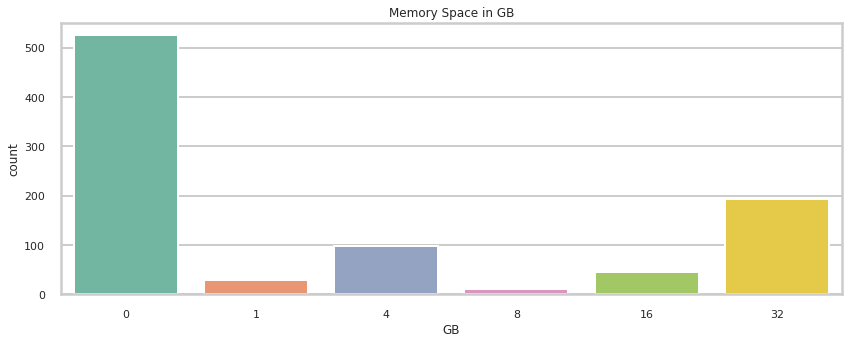

In [46]:
# Visualization of count of product across Memory
plt.figure(figsize=(14,5))
plt.title("Memory Space in GB")
sns.countplot('Memory', data=df)
plt.xlabel("GB")

In [47]:
# Table of brands and it's avg memory
brand_mean11 = df.groupby(['Brand'])['Memory'].mean().reset_index()
brand_mean11.sort_values(by='Memory',ascending=False).head(100)

,Brand,Memory
0,APPLE,23.881041
8,SAMSUNG,9.288136
5,Honor,3.384615
3,FOSSIL,2.101852
6,Huawei,1.761905
4,GARMIN,0.703488
1,Amazfit,0.000000
2,FITBIT,0.000000
7,Noise,0.000000
9,boAt,0.000000


Text(0, 0.5, 'Avg.Memory')

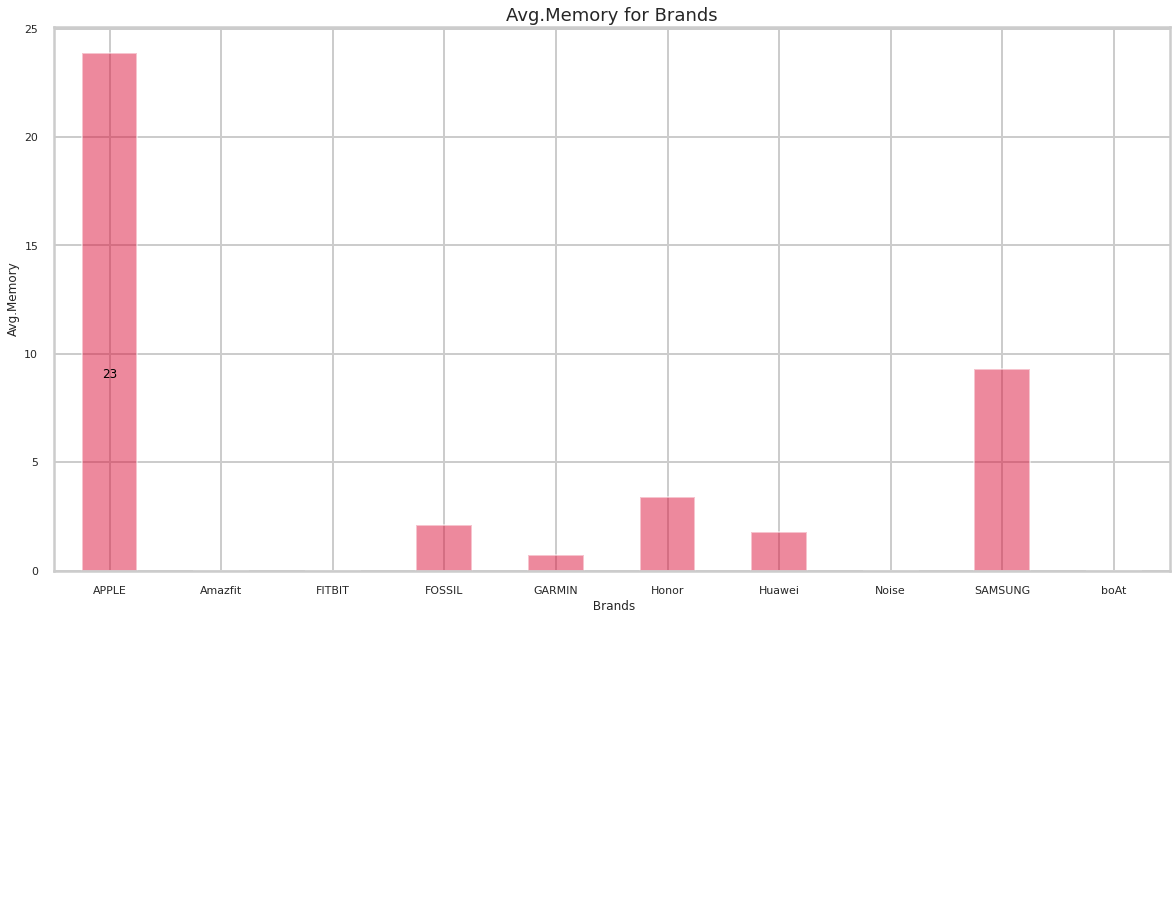

In [48]:
# Visualization of avg Memory for each brand
sns.set_context("poster",font_scale=0.5)
plt.figure(figsize=(20,10))
ax = df.groupby('Brand')['Memory'].mean().plot(kind='bar',color='crimson',alpha=0.5,rot=0)

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()-15),ha='center',va="baseline",color='Black')
    
plt.title('Avg.Memory for Brands',fontsize=18)
plt.xlabel(' Brands')
plt.ylabel('Avg.Memory')

In [49]:
# Table of products and it's brand and Memory
brand_mean12 = df.groupby(['Brand','Product_name'])['Memory'].mean().reset_index()
brand_mean12.sort_values(by='Memory',ascending=False).head()

,Brand,Product_name,Memory
0,APPLE,APPLE Apple Watch SE,32.0
62,APPLE,APPLE Watch Series7 (GPS-45mm) (PRODUCT)RED Al...,32.0
60,APPLE,"APPLE Watch Series7 (GPS, 45mm) - Midnight Alu...",32.0
58,APPLE,"APPLE Watch Series7 (GPS, 45mm) - Blue Alumini...",32.0
57,APPLE,"APPLE Watch Series7 (GPS, 41mm) - Starlight Al...",32.0


##**4.Visual representation text data and insights on trends and patterns**

---


 
Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.


In [50]:
# Importing required library
from wordcloud import WordCloud, STOPWORDS

In [51]:
text = "".join(d for d in df['Description'])

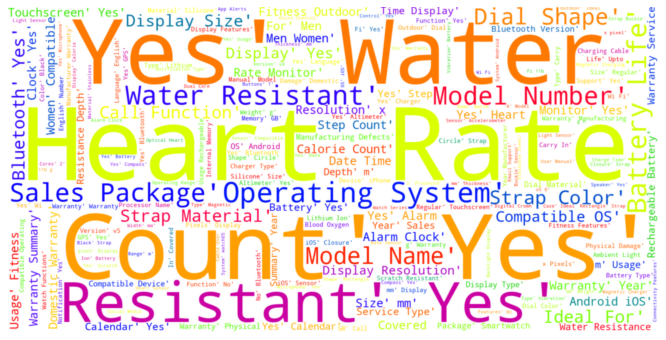

In [52]:
# Wordcloud Visualization of description
wc = WordCloud(width= 1600,height=800,colormap='prism',background_color = 'white').generate(text)
plt.figure(figsize = (30, 6))
plt.imshow(wc, interpolation="gaussian")
plt.axis("off")
plt.show()

##**Wordcloud Visualization - Description of each Brand**

In [60]:
df['Brand'].value_counts()

APPLE      269
GARMIN     172
FOSSIL     108
Noise       96
boAt        64
SAMSUNG     59
FITBIT      51
Amazfit     47
Huawei      21
Honor       13
Name: Brand, dtype: int64

In [62]:
APPLE=df[df.Brand == "APPLE"]
GARMIN=df[df.Brand == "GARMIN"]   
FOSSIL=df[df.Brand == "FOSSIL"]
Noise=df[df.Brand == "Noise"]
boAt=df[df.Brand == "boAt"]      
SAMSUNG=df[df.Brand == "SAMSUNG"]     
FITBIT=df[df.Brand == "FITBIT"]     
Amazfit=df[df.Brand == "Amazfit"]     
Huawei=df[df.Brand == "Huawei"]    
Honor=df[df.Brand == "Honor"]

In [64]:
APPLE_text = str(APPLE.Description)
GARMIN_text = str(GARMIN.Description)   
FOSSIL_text = str(FOSSIL.Description)
Noise_text = str(Noise.Description)
boAt_text = str(boAt.Description)     
SAMSUNG_text = str(SAMSUNG.Description)     
FITBIT_text = str(FITBIT.Description)   
Amazfit_text = str(Amazfit.Description)  
Huawei_text = str(Huawei.Description) 
Honor_text = str(Honor.Description)

In [65]:
APPLE_wordcloud = WordCloud(
        background_color="white",
        width=900,
        height=500
    ).generate(APPLE_text)

GARMIN_wordcloud = WordCloud(
        background_color="white",
        width=900,
        height=500
    ).generate(GARMIN_text)

FOSSIL_wordcloud = WordCloud(
        background_color="white",
        width=900,
        height=500
    ).generate(FOSSIL_text)

Noise_wordcloud = WordCloud(
        background_color="white",
        width=900,
        height=500
    ).generate(Noise_text)

boAt_wordcloud = WordCloud(
        background_color="white",
        width=900,
        height=500
    ).generate(boAt_text)

SAMSUNG_wordcloud = WordCloud(
        background_color="white",
        width=900,
        height=500
    ).generate(SAMSUNG_text)

FITBIT_wordcloud = WordCloud(
        background_color="white",
        width=900,
        height=500
    ).generate(FITBIT_text)

Amazfit_wordcloud = WordCloud(
        background_color="white",
        width=900,
        height=500
    ).generate(Amazfit_text)

Huawei_wordcloud = WordCloud(
        background_color="white",
        width=900,
        height=500
    ).generate(Huawei_text)

Honor_wordcloud = WordCloud(
        background_color="white",
        width=900,
        height=500
    ).generate(Honor_text)



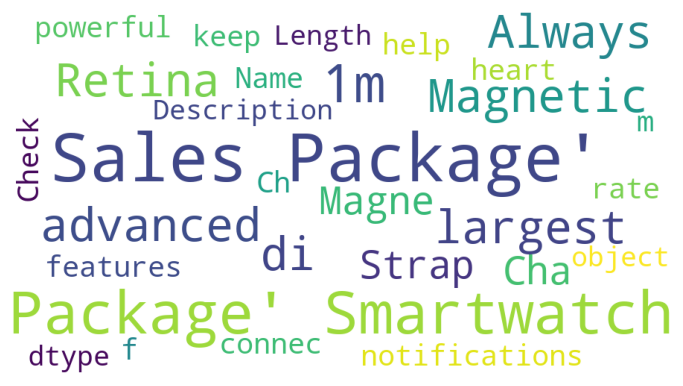

APPLE


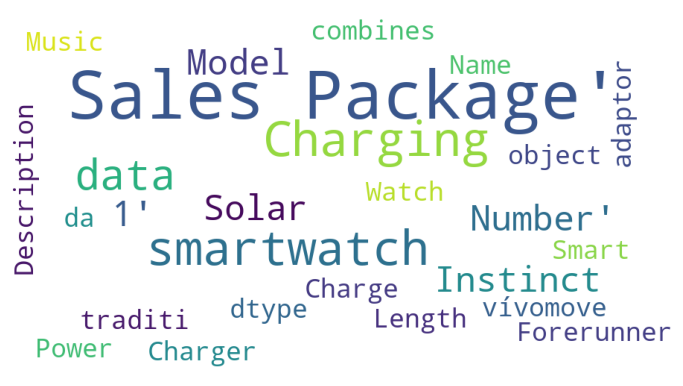

GARMIN


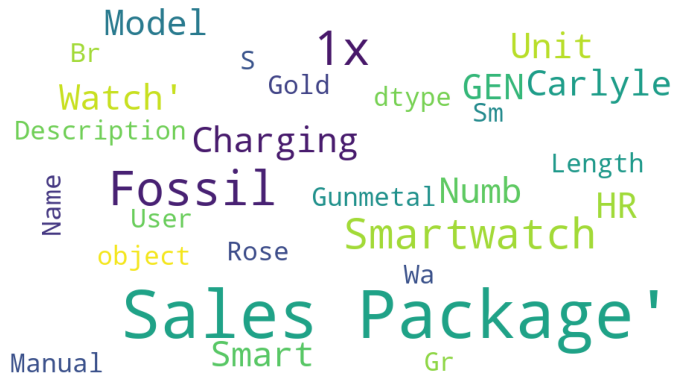

FOSSIL


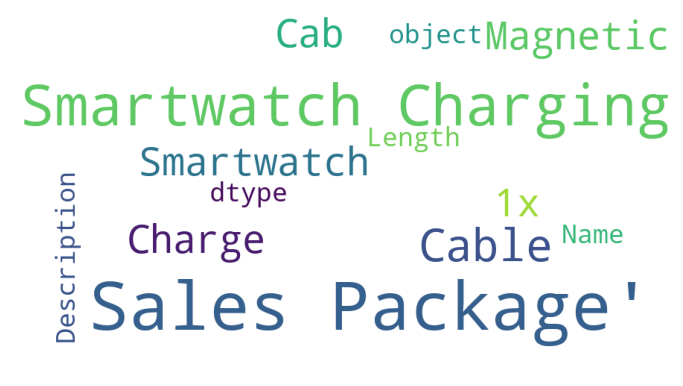

Noise


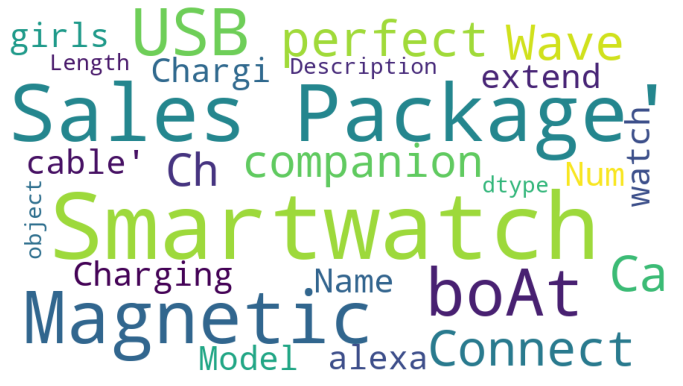

boAt_wordcloud


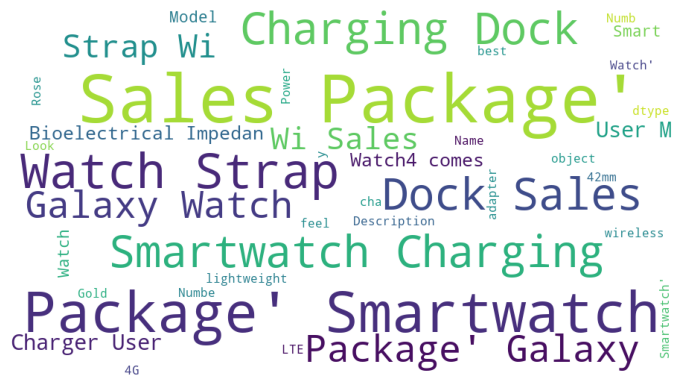

SAMSUNG


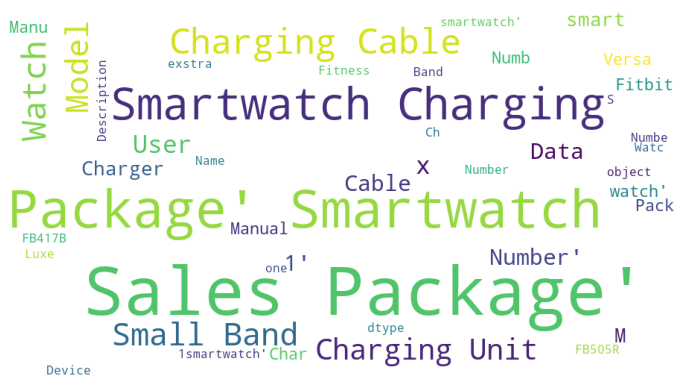

HFITBIT


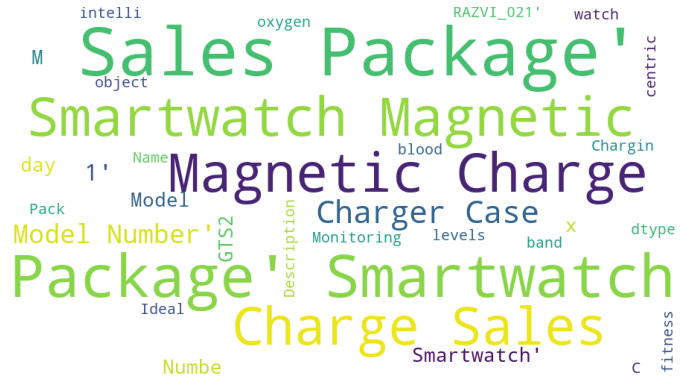

Amazfit


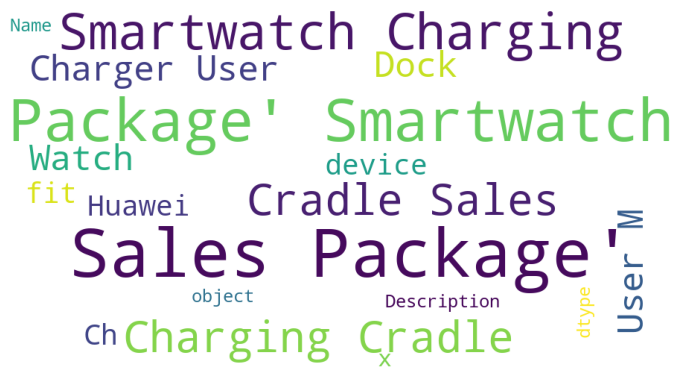

Huawei


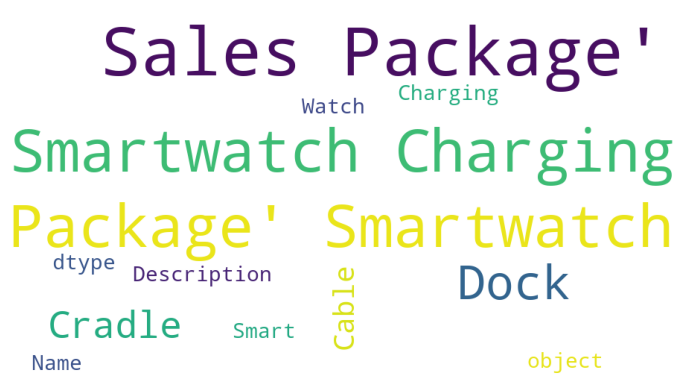

Honor


In [66]:
plt.figure(figsize=(12,10))
plt.imshow(APPLE_wordcloud)
plt.axis("off")
plt.show()
print("APPLE")

plt.figure(figsize=(12,10))
plt.imshow(GARMIN_wordcloud)
plt.axis("off")
plt.show()
print("GARMIN")

plt.figure(figsize=(12,10))
plt.imshow(FOSSIL_wordcloud)
plt.axis("off")
plt.show()
print("FOSSIL")

plt.figure(figsize=(12,10))
plt.imshow(Noise_wordcloud)
plt.axis("off")
plt.show()
print("Noise")

plt.figure(figsize=(12,10))
plt.imshow(boAt_wordcloud)
plt.axis("off")
plt.show()
print("boAt_wordcloud")

plt.figure(figsize=(12,10))
plt.imshow(SAMSUNG_wordcloud)
plt.axis("off")
plt.show()
print("SAMSUNG")

plt.figure(figsize=(12,10))
plt.imshow(FITBIT_wordcloud)
plt.axis("off")
plt.show()
print("HFITBIT")

plt.figure(figsize=(12,10))
plt.imshow(Amazfit_wordcloud)
plt.axis("off")
plt.show()
print("Amazfit")

plt.figure(figsize=(12,10))
plt.imshow(Huawei_wordcloud)
plt.axis("off")
plt.show()
print("Huawei")

plt.figure(figsize=(12,10))
plt.imshow(Honor_wordcloud)
plt.axis("off")
plt.show()
print("Honor")


## **Overview of the dataset**

---



In [53]:
# Importing  the required library
import plotly.express as px

In [54]:
m=df["Brand"].value_counts()

In [55]:
# Table of each products and it's brand ,MRP ,rating
b = df.groupby(['Brand','Product_name'])['Memory','MRP','Star_rating'].mean().reset_index()
b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Brand,Product_name,Memory,MRP,Star_rating
0,APPLE,APPLE Apple Watch SE,32.0,31400.000000,4.600000
1,APPLE,APPLE Watch,0.0,57455.555556,4.366667
2,APPLE,APPLE Watch 2 -,0.0,66400.000000,4.600000
3,APPLE,APPLE Watch Nike Series 5 GPS,32.0,42400.000000,3.525000
4,APPLE,APPLE Watch Nike Series 5 GPS + Cellular,32.0,51400.000000,3.050000
...,...,...,...,...,...
373,boAt,boAt Wave Ultima with 1.8 inch Curve Arc HD Di...,0.0,6990.000000,4.200000
374,boAt,boAt Wave beat 1.69Inch HD display with comple...,0.0,5990.000000,4.100000
375,boAt,boAt Wave pro 1.69inch HD display withTemperat...,0.0,6990.000000,3.900000
376,boAt,boAt Xplorer Smartwatch,0.0,7990.000000,3.800000


In [56]:
# Sunburst charts visualization for each product
import plotly.express as px
fig = px.sunburst(b, path=['Brand', 'Product_name', 'MRP'], values='Star_rating')
fig.show()

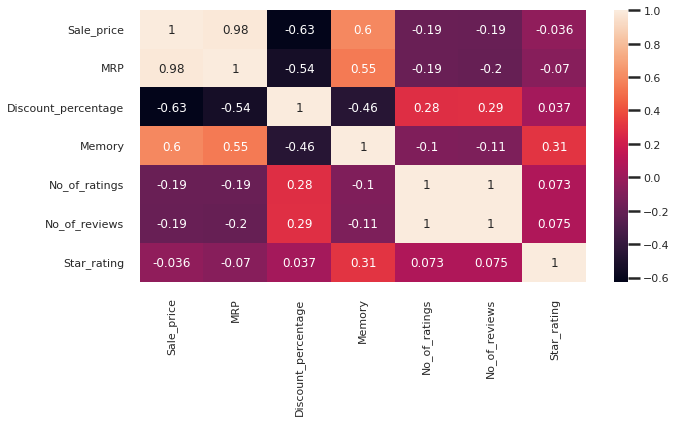

In [57]:
# Heatmap representing correlation between each features
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

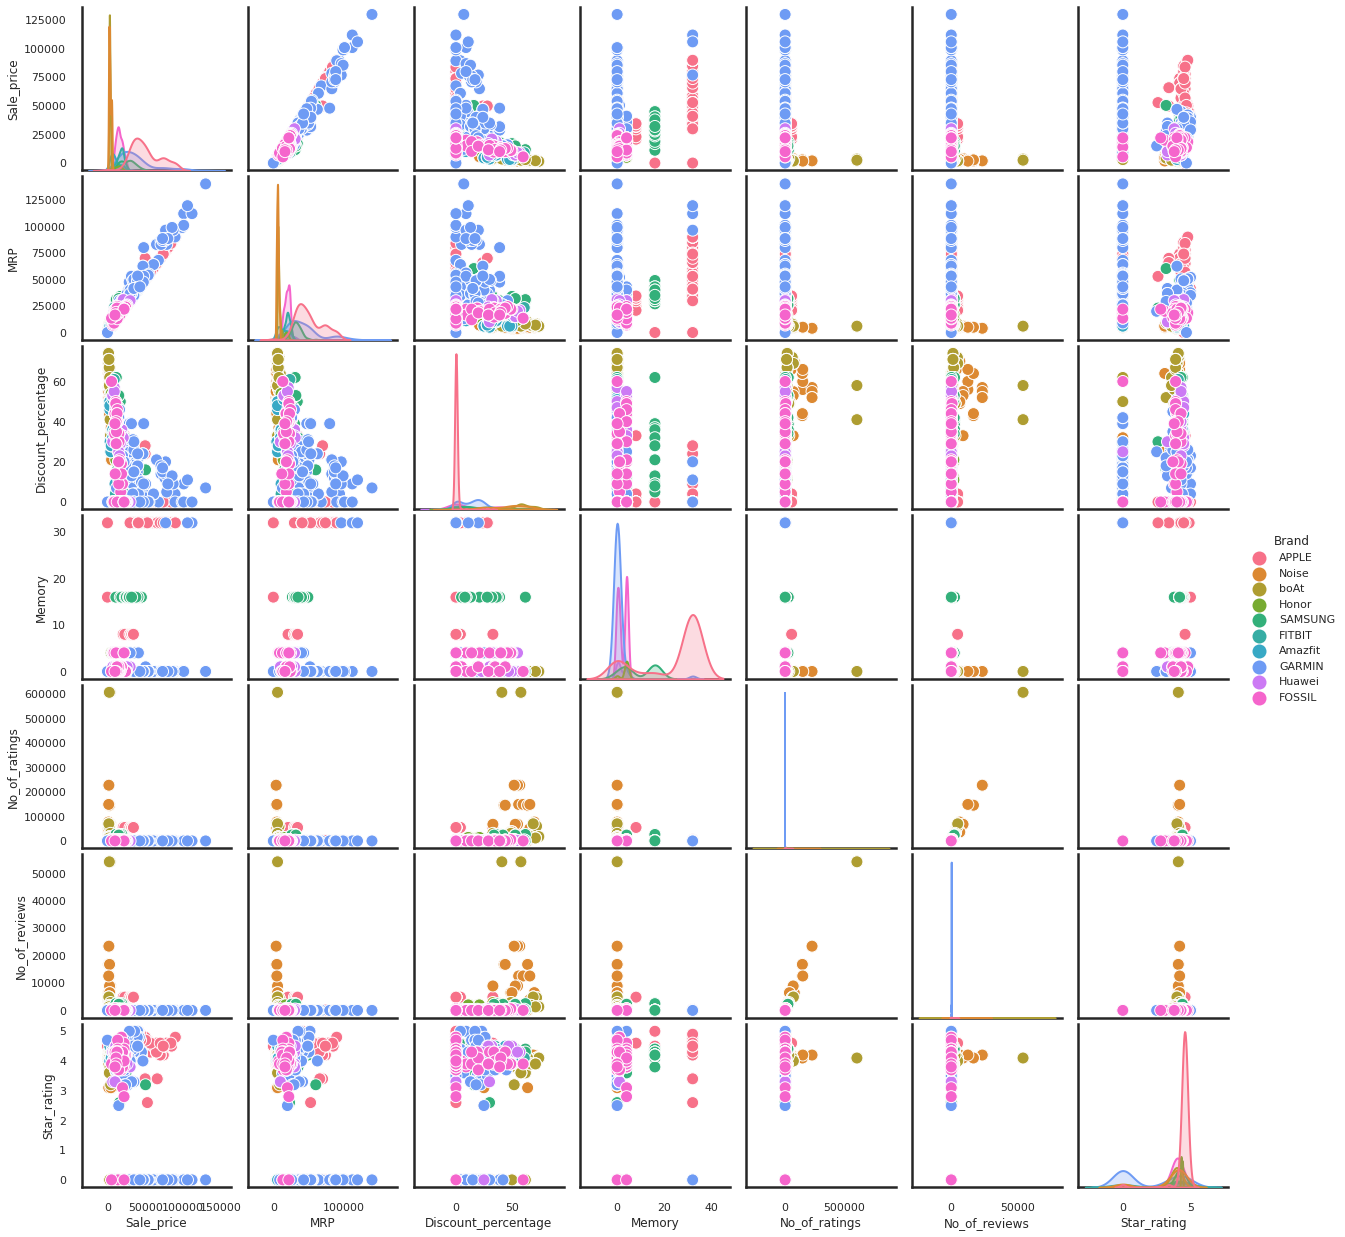

In [58]:
# Visualization representing relation between each attributes
sns.set_style("white")
sns.pairplot(df, hue='Brand')

##**Result:**


---



*  Apple is a brand that is very popular even without discount offers. So more products from Apple can be sold.



#**Conclusion**

---



The e-commerce industry has experienced tremendous growth over the last few years. To remain competitive, companies need to analyze the market and internal developments. Competitive data analysis and visualization therefore play an important role in the development and sustainability of a company and Personalize the customer’s shopping experience
 The purpose of this blog is to give you a better understanding of the various financial strategies that different brands use to improve their markets and increase sales of their products. This analysis showed the various factors which can affect the performance of a company and visualization of the results of our analysis helps us to reach a conclusion faster.
	
